# Giving perturbation at p array

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfinv
from scipy.stats import cauchy

In [2]:
Quantile_Lorentzian = lambda x,d,N : np.array([d*np.tan(np.pi/2 * (2*i - (N + 1))/(N+1)) + x for i in range(1,N+1)])
Quantile_Normal = lambda mu,sigma,N : np.array([mu +sigma*(2**0.5)*erfinv((2*i - N - 1)/(N+1)) for i in range(1,N+1)])

In [3]:
Q_L = lambda mu,d,p: d*np.tan(np.pi/2 * (2*p - 1)) + mu
Q_L_ALL = lambda mu,d,N:Q_L(mu,d,np.random.rand(N))

In [4]:
N = 500
eps = (1/(N+1))*(1/1000)

In [9]:
Rand_P = lambda N,dinv: np.arange(1,N+1)/(N+1) + (1/(N+1))*(1/dinv) * (np.random.rand(N)-0.5)

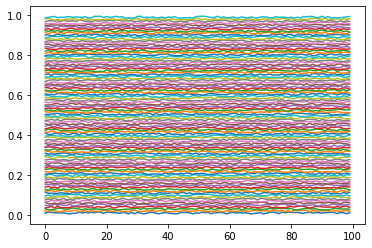

In [34]:
plt.plot([Rand_P(100,1) for _ in range(100)]);

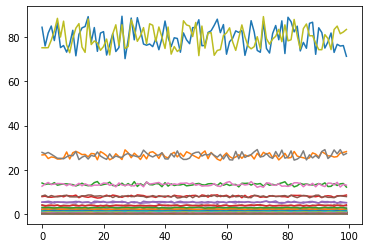

In [57]:
plt.plot(np.diff([Q_L(0,1,Rand_P(500,10)) for _ in range(100)]));

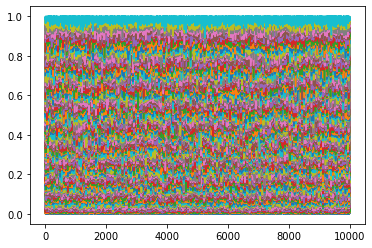

In [30]:
plt.plot([np.sort(np.random.rand(100)) for _ in range(10000)]);


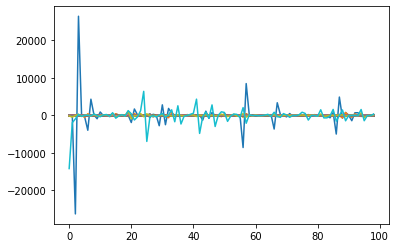

In [85]:
plt.plot(np.diff([Q_L(0,1,np.sort(np.random.rand(500))) for _ in range(100)],axis=0));

In [91]:
A =np.array([Q_L(0,1,Rand_P(N,1000)) for _ in range(63)])

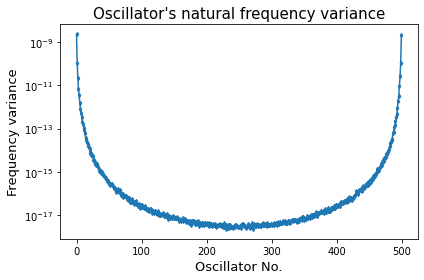

In [88]:
plt.plot(np.var(A,axis=0)[:],'-d',markersize=3)
plt.yscale('log')
plt.xlabel("Oscillator No.",fontsize=13)
plt.ylabel("Frequency variance",fontsize=13)
plt.title("Oscillator's natural frequency variance",fontsize=15)
plt.tight_layout()
# plt.savefig('Review2/Oscillator\'s natural frequency variance.png',dpi=400)
# plt.plot(np.var(A,axis=0)[:-10])

In [89]:
int_ =np.linspace(0.05,0.95,500)
color = plt.cm.hsv(int_)

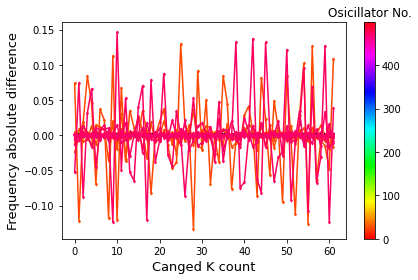

In [92]:
for i,temp  in enumerate((np.diff(A,axis=0).T[::])):
    plt.plot(temp,'-d',color=color[i],markersize=2)

Temp = plt.scatter(np.zeros(N),np.zeros(N),c=np.arange(0,N),s=0)
# plt.yscale('log')
plt.xlabel("Canged K count",fontsize=13)
plt.ylabel("Frequency absolute difference",fontsize=13)
# plt.title("Oscillator's frequency variation from mena",fontsize=15)
plt.hsv()
clb = plt.colorbar(Temp)
clb.ax.set_title('Osicillator No.')
plt.tight_layout()

# plt.savefig('Review2/Oscillator\'s natural frequency log diff.png',dpi=400)


In [76]:
np.diff([Q_L(0,1,Rand_P(500,10)) for _ in range(100)])

array([[85.3746142 , 24.63817055, 13.96816184, ..., 13.70345643,
        26.418613  , 84.31306913],
       [77.63853418, 25.83044665, 12.46945299, ..., 12.72619571,
        26.19984741, 84.25846769],
       [79.81131275, 26.58041563, 12.31934949, ..., 13.04500975,
        26.33330896, 85.23875504],
       ...,
       [80.62888715, 27.62263844, 12.28622047, ..., 13.00202086,
        28.0860103 , 76.02651866],
       [72.32027432, 27.69370643, 13.14675058, ..., 14.10390101,
        24.00145796, 80.05027027],
       [84.44653765, 27.3400048 , 13.44906021, ..., 12.3613485 ,
        27.22287401, 77.58138531]])

In [84]:
np.diff([Q_L(0,1,Rand_P(5,10)) for _ in range(100)],axis=0).shape

(99, 5)

# Scenario 2
Change P and control
>> oscillator에 주는 변화를 조절할 수 있다고 봄


In [148]:
from TO_sim.Sol_Kuramoto import *
from TO_sim.gen_Distribution import *
from TO_sim.To_Draw import *
import matplotlib.pyplot as plt
import parmap
import numpy as np
# from tqdm import tqdm_notebook
from tqdm.notebook import tqdm
Rand_P = lambda N,dinv: np.arange(1,N+1)/(N+1) + (1/(N+1))*(1/dinv) * (np.random.rand(N)-0.5)
import os
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print('Error: Creating directory.' + directory)

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

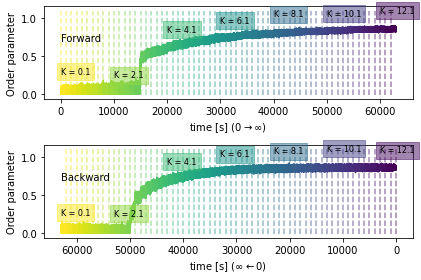

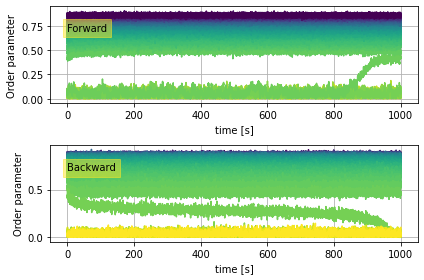

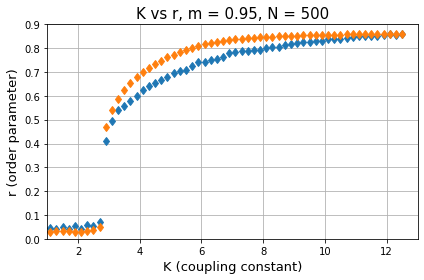

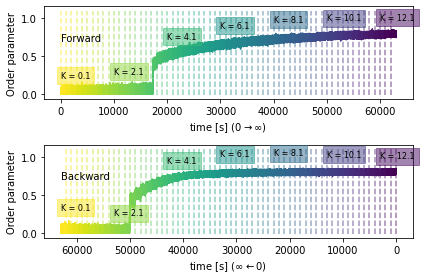

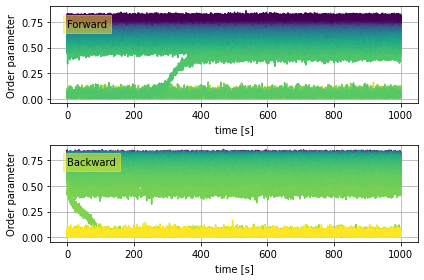

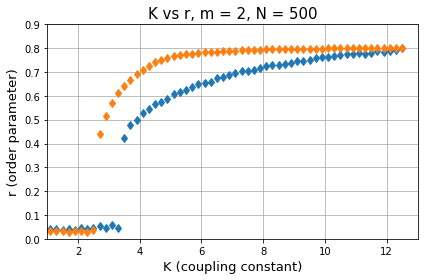

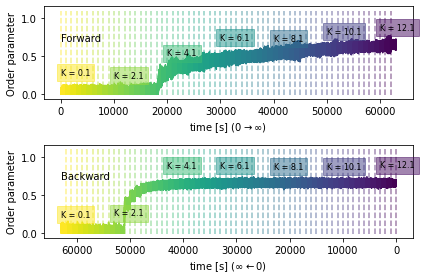

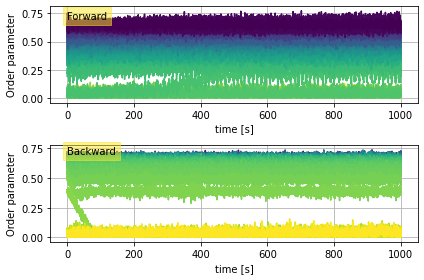

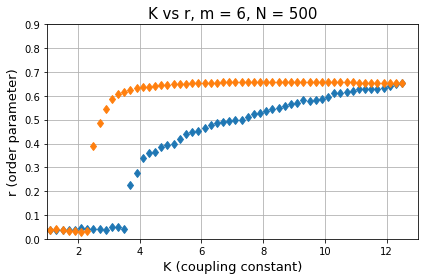

In [149]:
for m in [0.95,2,6]:
    N  =  500
    K_start = 0.1
    K_end = 12.5
    dK = 0.2
    Ks = np.arange(K_start,K_end + dK,dK)
    # m = 0.95
    dtheta_init = np.zeros(N)
    t_end = 1000
    Noise_inv = (1/20)
    dt = 0.1
    dist = "Quantile Lorentzian" 
    if dist == "Normal":
        theta_init,omega_init, Kc = Normal(N,0,1,seed=0)
    elif dist == "Lorentzian":
        theta_init,omega_init, Kc = Lorentzian(N,0,1,seed=0)
    elif dist == "Quantile Lorentzian":
        theta_init,omega_init, Kc = Quantile_Lorentzian(N,0,1,seed=0)
        
    theta_dic = {}
    dtheta_dic = {}
    rs_dic = {}
    omega_dic = {}
    t_dic = {}

    num = 0
    for K in tqdm(Ks):
        if num == 0:
            omega =  Q_L(0,1,Rand_P(N,Noise_inv))
            theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),dt=dt,p_theta=theta_init,p_dtheta=dtheta_init,p_omega=omega,distribution="Normal")
        else:
            omega =  Q_L(0,1,Rand_P(N,Noise_inv))
            theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),dt=dt,p_theta=theta_dic[num-1][-1],p_dtheta=dtheta_dic[num-1][-1],
                                                        p_omega=omega,distribution="Normal")
            # theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),dt=dt,p_theta=theta_dic[num-1][-1],p_dtheta=dtheta_init,p_omega=omega_dic[num-1],distribution="Normal")
        theta_dic[num] = theta_s
        dtheta_dic[num] = dtheta_s
        rs_dic[num] = rs
        omega_dic[num] = omega
        t_dic[num] = t + num*t_end
        num += 1
    theta_r_init,dtheta_r_init = theta_dic[num-1][-1],dtheta_dic[num-1][-1]

    theta_r_dic = {}
    dtheta_r_dic = {}
    rs_r_dic = {}
    omega_r_dic = {}
    t_r_dic = {}
    dKr = -0.2
    Ksr = np.arange(K_end,K_start + dKr,dKr)

    num_r = 0
    for K in tqdm(Ksr):
        if num_r == 0:
            theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),dt=dt,p_theta=theta_r_init,p_dtheta=dtheta_r_init,p_omega=omega_init,distribution=dist)
            # theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),dt=dt,p_theta=theta_r_init,p_dtheta=dtheta_init,p_omega=omega_init,distribution=dist)
        else:
            theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),dt=dt,p_theta=theta_r_dic[num_r-1][-1],
                                                        p_dtheta=dtheta_r_dic[num_r-1][-1],p_omega=omega_r_dic[num_r-1],distribution=dist)
            # theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),dt=dt,p_theta=theta_r_dic[num_r-1][-1],p_dtheta=dtheta_init,p_omega=omega_r_dic[num_r-1],distribution=dist)
        theta_r_dic[num_r] = theta_s
        dtheta_r_dic[num_r] = dtheta_s
        rs_r_dic[num_r] = rs
        omega_r_dic[num_r] = omega
        t_r_dic[num_r] = t + num_r*t_end
        num_r += 1
        
        
    createFolder(f"Review2/Control_P/Noise_inv = {Noise_inv}")
    Time_R(Ks,t_dic,rs_dic,t_r_dic,rs_r_dic,dK,dt,t_end,N,m,mean_time=50,save=True,Folder_name=f"Review2/Control_P/Noise_inv = {Noise_inv}")


In [ ]:
A = np.array([np.sort(Q_L_ALL(0,1,N)) for _ in Ks])

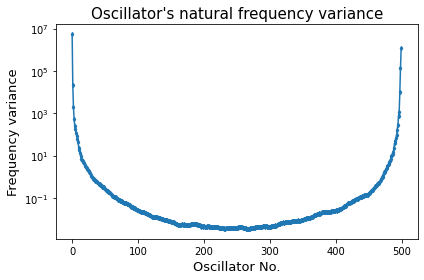

In [ ]:
plt.plot(np.var(A,axis=0)[:],'-d',markersize=3)
plt.yscale('log')
plt.xlabel("Oscillator No.",fontsize=13)
plt.ylabel("Frequency variance",fontsize=13)
plt.title("Oscillator's natural frequency variance",fontsize=15)
plt.tight_layout()
plt.savefig('Review2/Control_P/Oscillator\'s natural frequency variance.png',dpi=400)
# plt.plot(np.var(A,axis=0)[:-10])

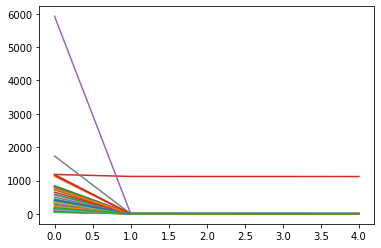

In [ ]:
plt.plot(abs(A.T-np.mean(A,axis=1))[::100]);


In [ ]:
int_ =np.linspace(0.05,0.95,500)
color = plt.cm.hsv(int_)

In [ ]:
np.diff(A,axis=0).shape

(62, 500)

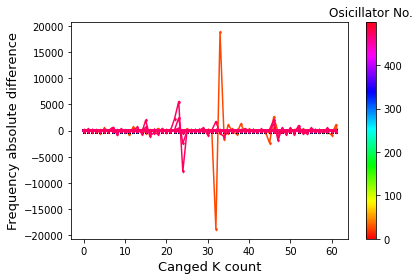

In [ ]:
for i,temp  in enumerate((np.diff(A,axis=0).T[::])):
    plt.plot(temp,'-d',color=color[i],markersize=2)

Temp = plt.scatter(np.zeros(N),np.zeros(N),c=np.arange(0,N),s=0)
# plt.yscale('log')
plt.xlabel("Canged K count",fontsize=13)
plt.ylabel("Frequency absolute difference",fontsize=13)
# plt.title("Oscillator's frequency variation from mena",fontsize=15)
plt.hsv()
clb = plt.colorbar(Temp)
clb.ax.set_title('Osicillator No.')
plt.tight_layout()

# plt.savefig('Review2/Oscillator\'s natural frequency log diff.png',dpi=400)


In [ ]:
for temp  in (A.T-np.mean(A,axis=1))[20:-20:10]:
    plt.plot(temp)